# Community detection - Exploration

In this Notebook you will get acquainted with the problem of community detection. In a nutshell, in this problem we have a graph $G = (V,E)$ with $m$ communities and an assignment $c : V \to \{1,m\}$ where $c(i)$ denotes the community node $i$ belongs to. The goal of community detection is to predict the community labels solely based on the edges. 

In [1]:
import networkx as nx
from pathlib import Path
import matplotlib.pyplot as plt

**Exercise 1.** Write code to read the graph in the file `graph_with_communities_1.gz` and draw it. This graph has two communities. Draw the graph and try to identify to which community each node belongs. Explain your reasoning behind your community assignment and visualize your solution by giving nodes of different communities different colors.

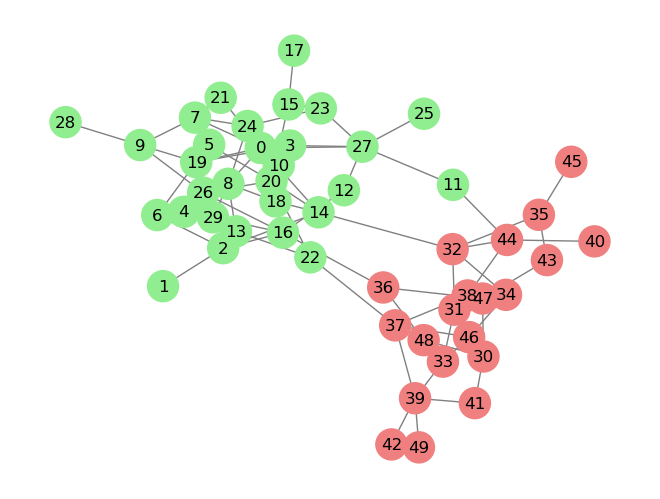

In [61]:
G = nx.read_multiline_adjlist('../Data sets/Community Detection/graph_with_communities_1.gz')
#draw the graph
pos = nx.spring_layout(G)
#nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
#plt.title("Graph with Communities")
#plt.show()

#This graph has two communities. Draw the graph and try to identify to which community each node belongs. Explain your reasoning behind your community assignment and visualize your solution by giving nodes of different communities different colors.
#EMPIRICALLY
#Community 1: {17, 28, 9,7,21,19,6,1,3,2,10,25,27,18,8,0,24,26,23,29,16,14,13,20,15,17,5,22,11,36}
#Community 2: {49,42,39,41,30,33,46,48,37,38,34,31,47,32,44,43,40,35,45}
#color
color_map = []
for node in G:
    if node in {'4','12','17','28','9','7','21','19','6','1','3','2','10','25','27','18','8','0','24','26','23','29','16','14','13','20','15','17','5','22','11'}:
        color_map.append('lightgreen')
    else:
        color_map.append('lightcoral')
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color='gray', node_size=500)


🔑 Principle of spring_layout (Fruchterman–Reingold force-directed layout)
- It models the graph like a physical system:
- Edges are springs that pull connected nodes closer.
- Nodes are particles with repulsive forces that push all nodes apart.
- The algorithm iteratively minimizes an “energy function” until a balance is reached.

👉 Why clusters appear

If your graph has two communities:
- Many edges are inside each community (strong springs pull them close together).
- Few edges exist between communities (weak connections, so they don’t pull clusters tightly together).
- Repulsive forces then push the two dense regions apart.

Result: two visually separated blobs.

**Exercise 2.** Write a function that puts your reasoning in previous exercise into practice. It should have as input the number of communities to find and as output an array of length `number of nodes` such that item `i` is the community label of node at position `i` in the list of nodes. Test your code on the previous graph. Does it output the communities you expected? If it did not: can you explain why?

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


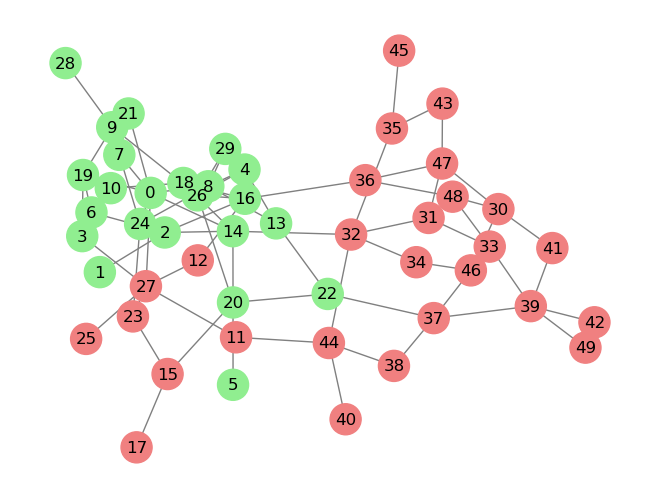

In [90]:
import networkx as nx
import random

def findCommunities(m, G):
    """
    Very simple community detection - like k-means but for graphs
    """
    nodes = list(G.nodes())
    
    # Step 1: Start by putting nodes in communities randomly
    community_labels = []
    for i in range(len(nodes)):
        if i < len(nodes) // 2:
            community_labels.append(0)  # First half in community 0
        else:
            community_labels.append(1)  # Second half in community 1
    
    # Step 2: Improve the communities by moving nodes around
    # We'll do this 5 times
    for round_num in range(1000):
        
        # For each node, see if it should move to a different community
        for i in range(len(nodes)):
            node = nodes[i]
            current_community = community_labels[i]
            
            # Count connections to community 0
            connections_to_comm0 = 0
            for neighbor in G.neighbors(node):
                # Find which community this neighbor is in
                for j in range(len(nodes)):
                    if nodes[j] == neighbor and community_labels[j] == 0:
                        connections_to_comm0 += 1
                        break
            
            # Count connections to community 1
            connections_to_comm1 = 0
            for neighbor in G.neighbors(node):
                # Find which community this neighbor is in
                for j in range(len(nodes)):
                    if nodes[j] == neighbor and community_labels[j] == 1:
                        connections_to_comm1 += 1
                        break
            
            # Move node to the community it has more connections to
            if connections_to_comm0 > connections_to_comm1:
                community_labels[i] = 0
            else:
                community_labels[i] = 1
    
    return community_labels

# test
community_labels = findCommunities(2, G)
print(community_labels)

# visualize
color_map = []
for label in community_labels:
    if label == 0:
        color_map.append('lightgreen')
    else:
        color_map.append('lightcoral')
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color='gray', node_size=500)


The graph in `graph_with_communities_1.gz` is actually generated by a Stochastic Block Model with parameters $\vec{n} = (30, 20)$ and $$P = \begin{pmatrix}
3/30 & 1/100 \\
   1/100  & 3/20
\end{pmatrix}.$$

In particular, nodes `0-29` form one community and `30-49` another. Knowing which model generated the graph can be very helpful if you want to find the communities.

**Exercise 3.** Adapt your method, so it is better suited for stochastic block models, and test it on the graph from Exercise 2. How is the performance of this method compared to the previous one? 

*IMPORTANT: Ensure your improved method does *not* use the parameters $\vec{n}$ or $P$ given above.*

In [39]:
def findCommunitiesSBM(m,G):
    community_labels = []
    
    # Your answer goes here
    
    return community_labels

We are now going to apply community detection to the real-world graph in the file ''graph_with_communities_2.gz''. This graph represents a social network of participants of a karate club. Due to some dispute between the original leader and another member, the group split into two new groups named: *Mr Hi* and *Officers*. The two leaders of the new groups are nodes `1` for *Mr Hi* and `32` for the *Officers*.

Below we draw the graph and colored the two leader nodes blue (Mr Hi) and red (Officers).

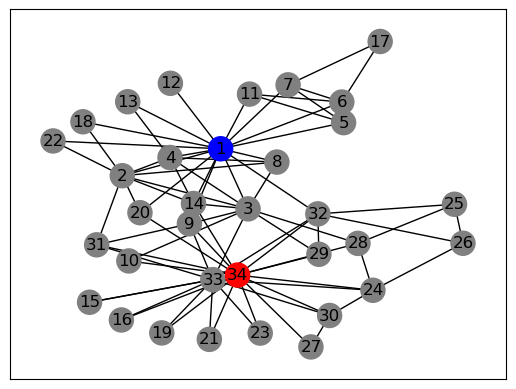

In [37]:
karate_graph = nx.read_multiline_adjlist("graph_with_communities_2.gz")

colors = ['gray']*34

color_index = -1

for node in G3.nodes():
    color_index += 1
    if (int(node) == 1):
        colors[color_index] = 'blue'
    elif (int(node) == 34):
        colors[color_index] = 'red'

nx.draw_networkx(karate_graph,pos=nx.kamada_kawai_layout(karate_graph),node_color=colors)

**Exercise 3.** Use both methods you created to identify for each node to which group they belong. For each method show the assignment by coloring nodes belonging to *Mr Hi* blue and those belonging to *Officers* red.

In [34]:
# Your answer goes here

The actuall group assignment of each `node` can be found by accessing its `group` attribute via `graph.nodes[node]['group']`.

**Exercise 4.** Validate the assigment found in the previous exercise with the truth. Which percentage of nodes did your methods correctely predict? Which nodes did it predict wrong and why could that be? Which method was better and why do you think that is?

In [ ]:
# Your answer goes here

Until now it was always clear how many communities each graph had. However, in real-life situations this is definitely not always the case. 

**Exercise 5.** How would you adopt your SBM method to work without knowing the number of communities upfront? What are the possible problems you could run into when applying this method?

In [ ]:
# Your answer goes here

To see what happens when using the wrong number of communities we consider the larger SBM graph contained in `graph_with_communities_3.gz`. This graph has $180$ nodes and two communities with the nodes with labels `0-99` forming one community and the rest the other one. 

**Exercise 6** Run your SBM method with `m = 2` and `m = 3`. How well does you method work for both cases? What is the difference between using the right and wrong number of communities? How would you explain this?

In [40]:
# Your answer goes here